# **Exploratory Data Analysis of Classic Cars for Restoration and Auction**

# Business Context

The client is a classic car restorer and auction house with operations located in about seven(7) countries in Europe.

This dataset provides comprehensive details about various classic cars. Key features of this dataset include details relating the following:

-Manufacturing details(name, model year and origin)

-Performance metrics of the cars(MPG, horsepower and acceleration)

-Physical Characteristics(weight, cylinders and displacement)

The client aims to understand the characteristics of different car models. The goal is to gain insights into factors affecting car performance, efficiency, and origin, which can inform strategic decisions related to product development, marketing, and competitive positioning.

The client also aims to use this data to understand the trends in the automotive industry during the 1970s and early 1980s. This will also help the department of resoration understand the most common engine configurations of various classic cars from all over the world over time.



The dataset was obtained from kaggle.com and the link is
https://www.kaggle.com/datasets/whenamancodes/automobiles-project-dataset

# Objective

As a data scientist, the goal is to clean and explore the data and provide answers to the business questions that the client has posed.
The results will also be visualized in order to facilitate understanding and interpretation of the results.

# Business Questions

1. What is the most common number of cylinders and calculate the average MPG for cars with that number.
2. What are the top 3 car manufacturers with highest average horsepower?
3. What is the percentage of cars with above-average MPG for each origin?
4. What is the range of weights for cars from each origin.
5. Which year had the largest improvement in average MPG compared to the previous year?

# Data Loading and Initial Exploration
Before answering the questions posed by the client, the data must be loaded then the first five(5) rows displayed. The column names and data types will also be displayed.

After that, missing values in each column will be determined. Duplicate values (if any) will be identified.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_org = pd.read_csv('Automobile.csv')
print("First 5 rows of the dataset:")
df_org.head()

First 5 rows of the dataset:


,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [ ]:
print("Number of rows and columns of the dataset:")
df_org.shape

Number of rows and columns of the dataset:


(398, 9)

In [ ]:
print("Missing values in the dataset:")
df_org.isnull().sum()

Missing values in the dataset:


,0
name,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0


In [ ]:
print("Data types of the columns in the dataset:")
df_org.dtypes

Data types of the columns in the dataset:


,0
name,object
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model_year,int64
origin,object


In [ ]:
print("Duplicate values in the dataset:")
df_org.duplicated().sum()

Duplicate values in the dataset:


np.int64(0)

# Data Preprocessing
Here, data quality issues will be identified.

From initial exploration, it can be seen that the 'horsepower' column contains missing values. Due to the nature of the missing values(which is numerical) and also the small number of missing values, the suggested way of handling the missing values is to replace them with the median. After finding the median and replacing the missing values with it, the 'horsepower' column must be verified to ensure that there are no remaining missing values.

After it is identified that there are no missing values, the business questions will be answered.

In [ ]:
print("Unique values in the 'horsepower' column before cleaning:")
df_org['horsepower'].unique()

Unique values in the 'horsepower' column before cleaning:


array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

Converting 'horsepower' to numeric, after coercing errors to NaN

In [ ]:
df_org['horsepower'] = pd.to_numeric(df_org['horsepower'], errors='coerce')

print("Missing values in the 'horsepower' column after converting to numeric:")
df_org['horsepower'].isnull().sum()

Missing values in the 'horsepower' column after converting to numeric:


np.int64(6)

Calculating the median of the 'horsepower' column

In [ ]:
median_horsepower = df_org['horsepower'].median()

print("Median of the 'horsepower' column:", median_horsepower)

Median of the 'horsepower' column: 93.5


Imputing missing values with the median

In [ ]:
df_org['horsepower'] = df_org['horsepower'].fillna(median_horsepower)

print("Missing values in the 'horsepower' column after imputing:")
df_org['horsepower'].isnull().sum()

Missing values in the 'horsepower' column after imputing:


np.int64(0)

In [ ]:
print("Unique values in the 'horsepower' column after cleaning:")
df_org['horsepower'].unique()

Unique values in the 'horsepower' column after cleaning:


array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

# Exploratory Data Analysis - Answering Business Questions

**1. What is the most common number of cylinders? Determine the average MPG for cars with the number obtained**

Here, the value counts for 'cylinders' is calculated, then the frequent value is found. After that, the DataFrame is filtered and the average MPG is calculated using the filtered data.

In [ ]:
cylinder_counts = df_org['cylinders'].value_counts()
most_common_cylinders = cylinder_counts.index[0]
df_most_common_cylinders = df_org[df_org['cylinders'] == most_common_cylinders]
average_mpg_most_common_cylinders = df_most_common_cylinders['mpg'].mean()

print(f"Most common number of cylinders:, {most_common_cylinders}")
print(f"Average MPG for cars with the most common number of cylinders:, {average_mpg_most_common_cylinders:.2f}")

Most common number of cylinders:, 4
Average MPG for cars with the most common number of cylinders:, 29.29


Bar plot illustrating the distribution of cars based on the number of cylinders:


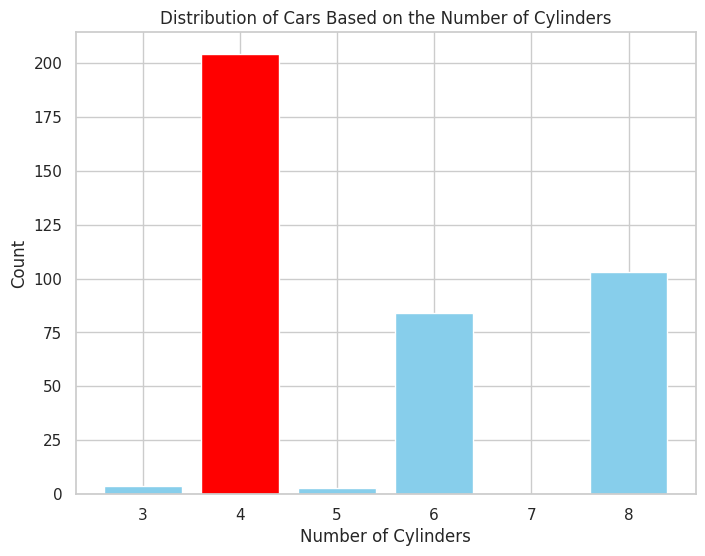

In [ ]:
print("Bar plot illustrating the distribution of cars based on the number of cylinders:")

sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
colors = ['skyblue'] * len(cylinder_counts)
most_common_index = cylinder_counts.index.get_loc(most_common_cylinders)
colors[most_common_index] = 'red'
plt.bar(cylinder_counts.index, cylinder_counts.values, color=colors)
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.title('Distribution of Cars Based on the Number of Cylinders')
plt.show()


In summary, a large proportion of cars in this dataset are 4-cylinder vehicles, and the average miles per gallon (mpg) for these cars is approximately 29.29

**2. What are the top 3 car manufacturers with the highest average horsepower**

Manufacturers can be found in the 'name' column. Hence the average horsepower for each manufacturer is calculated and sorted. The top 3 will then be identified as the top 3 car manufacturers with the highest average horsepower.

In [ ]:
df_org['manufacturer'] = df_org['name'].apply(lambda x: x.split()[0])
average_horsepower_by_manufacturer = df_org.groupby('manufacturer')['horsepower'].mean()
top_3_manufacturers = average_horsepower_by_manufacturer.sort_values(ascending=False).head(3)

print("Top 3 car manufacturers with the highest average horsepower:")
print(top_3_manufacturers)

Top 3 car manufacturers with the highest average horsepower:
manufacturer
hi          193.000000
chrysler    153.666667
cadillac    152.500000
Name: horsepower, dtype: float64


Bar plot illustrating the average horsepower of top 10 manufacturers:


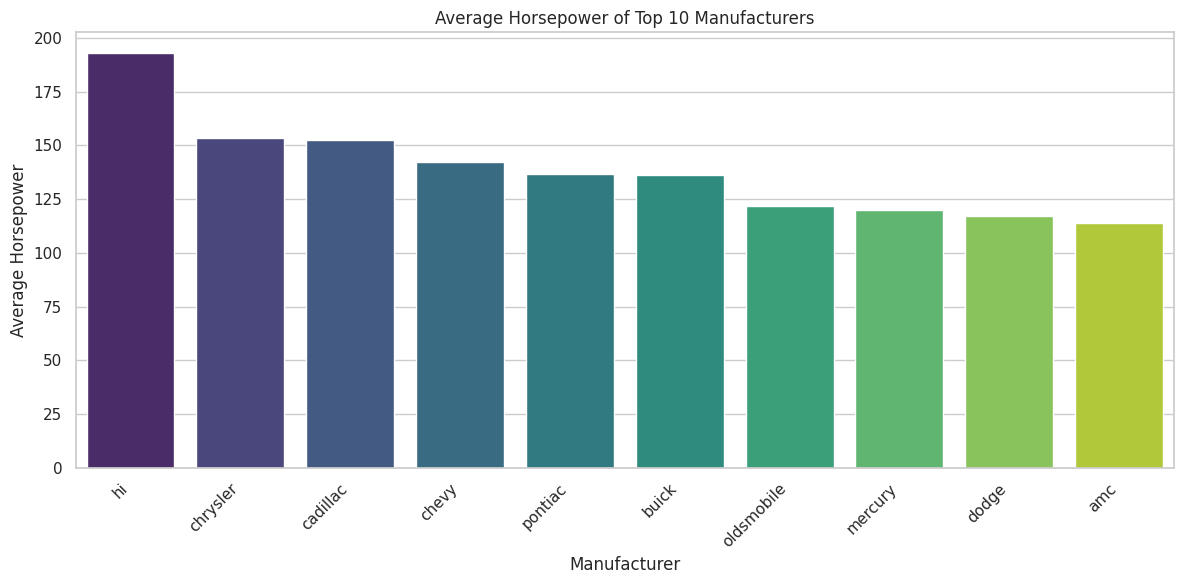

In [ ]:
print("Bar plot illustrating the average horsepower of top 10 manufacturers:")

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
top_10_manufacturers = average_horsepower_by_manufacturer.sort_values(ascending=False).head(10)
sns.barplot(x=top_10_manufacturers.index, y=top_10_manufacturers.values, hue=top_10_manufacturers.index, palette="viridis", legend=False)
plt.title('Average Horsepower of Top 10 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Average Horsepower')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The results clearly indicate that hi leads with an average horsepower of 193 with chrysler and cadillac following with 153.67 and 152.50 respectively

**3. The percentage of cars with above-average MPG for each origin**

First the overall average MPG is calculated then a boolean column indicating above-range MPG is created. The mean of this boolean column is then calculated by means of grouping by origin.

In [ ]:
overall_average_mpg = df_org['mpg'].mean()
df_org['above_average_mpg'] = df_org['mpg'] > overall_average_mpg
percentage_above_average_mpg_by_origin = df_org.groupby('origin')['above_average_mpg'].mean() * 100

print("Percentage of cars with above-average MPG for each origin:")
print(percentage_above_average_mpg_by_origin)

Percentage of cars with above-average MPG for each origin:
origin
europe    75.714286
japan     87.341772
usa       26.907631
Name: above_average_mpg, dtype: float64


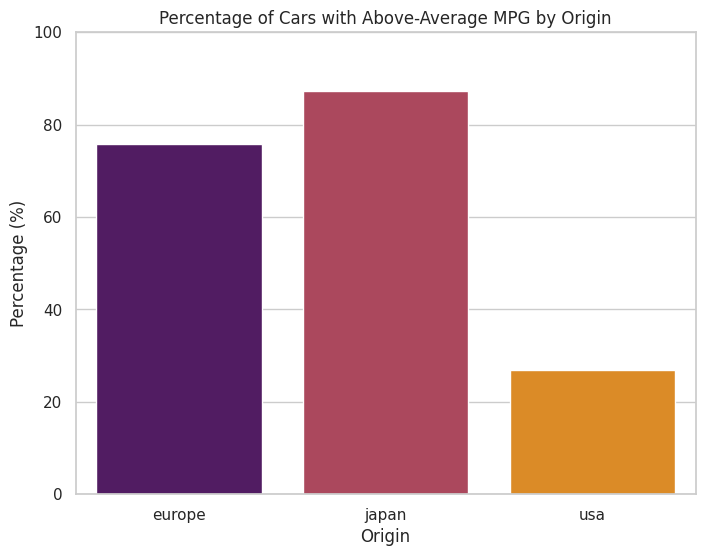

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_above_average_mpg_by_origin.index, y=percentage_above_average_mpg_by_origin.values, hue=percentage_above_average_mpg_by_origin.index, palette='inferno', legend=False)
plt.title('Percentage of Cars with Above-Average MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Percentage (%)')
plt.ylim(0,100)
plt.show()

This implies that cars from Japan and Europe tend to have better fuel efficiency(relative to overall average) than cars from the USA

**4. Determine the range of weights for cars from each origin**

This is done by calculating the minimum and maximum weight for each origin.

In [ ]:
weight_range_by_origin = df_org.groupby('origin')['weight'].agg(['min', 'max'])

print("Range of weights for cars from each origin:")
print(weight_range_by_origin)

Range of weights for cars from each origin:
         min   max
origin            
europe  1825  3820
japan   1613  2930
usa     1800  5140


Grouped bar plot illustrating the range of weights for cars from each origin:


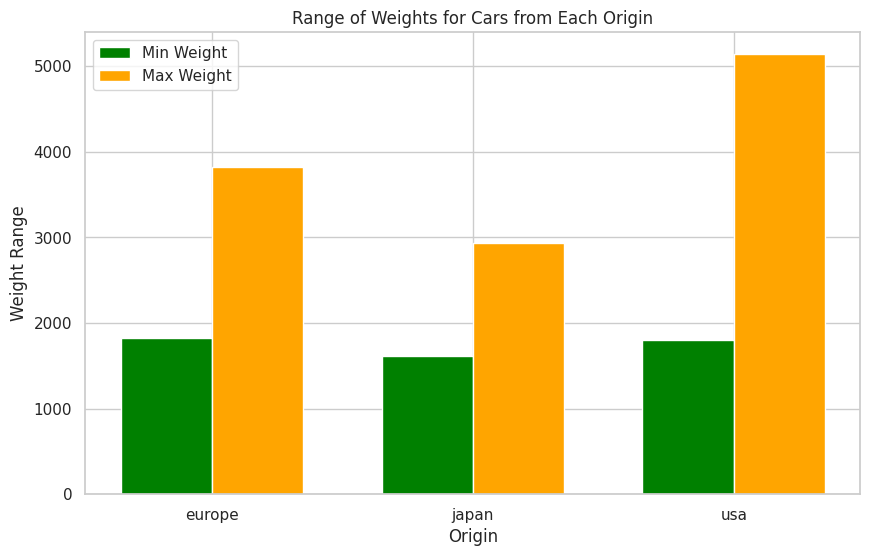

In [ ]:
print("Grouped bar plot illustrating the range of weights for cars from each origin:")

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
bar_width = 0.35
index = np.arange(len(weight_range_by_origin.index))
plt.bar(index, weight_range_by_origin['min'], bar_width, label='Min Weight', color='green')
plt.bar(index + bar_width, weight_range_by_origin['max'], bar_width, label='Max Weight', color='orange')
plt.title('Range of Weights for Cars from Each Origin')
plt.xlabel('Origin')
plt.ylabel('Weight Range')
plt.xticks(index + bar_width/2, weight_range_by_origin.index)
plt.legend()
plt.show()

In summary, the results show that cars from Japan in this dataset are generally the lightest with the least variation in weight, while cars from the USA cover the widest range of weights, including the heaviest vehicles.

**5. Find the year with the largest improvement in average mpg compared to the previous year.**

The average MPG for each year is calculated and the year with the largest improvement compared to the previous year is identified.

In [ ]:
average_mpg_by_year = df_org.groupby('model_year')['mpg'].mean()
mpg_improvement = average_mpg_by_year.diff()
year_with_largest_improvement = mpg_improvement.idxmax()

print("Year with the largest improvement in average mpg compared to the previous year:", year_with_largest_improvement)

Year with the largest improvement in average mpg compared to the previous year: 80


Line plot illustrating the improvement in average mpg over the years:


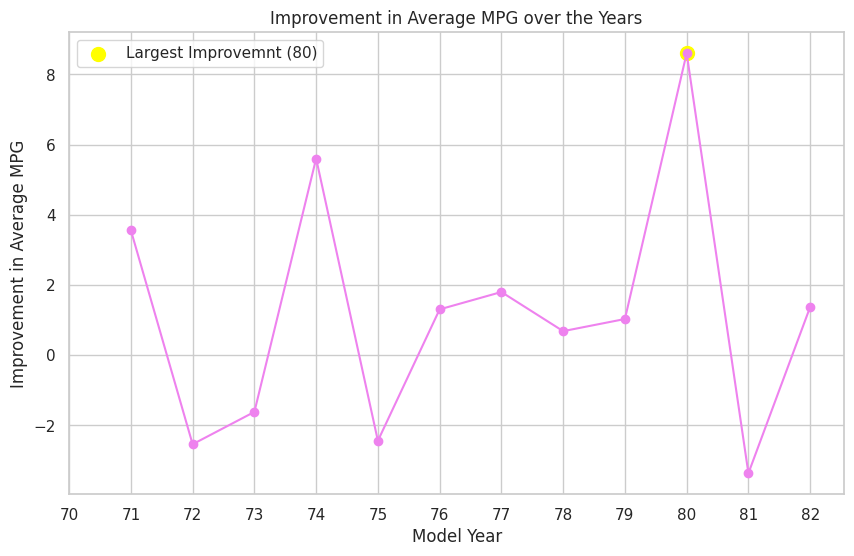

In [ ]:
print("Line plot illustrating the improvement in average mpg over the years:")

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
plt.plot(mpg_improvement.index, mpg_improvement.values, marker='o', linestyle='-', color='violet')
plt.scatter(year_with_largest_improvement, mpg_improvement.loc[year_with_largest_improvement], color='yellow', s=100, label=f'Largest Improvemnt ({year_with_largest_improvement})')
plt.title('Improvement in Average MPG over the Years')
plt.xlabel('Model Year')
plt.ylabel('Improvement in Average MPG')
plt.xticks(mpg_improvement.index)
plt.grid(True)
plt.legend()
plt.show()

This indicates that the average MPG for cars in model year 80 saw the biggest jump upwards compared to the average MPG in model 79.

# Final Discussion

**Strengths of the Analysis**

The analysis performed well in answering the client's business questions. The initial data loading and exploration provided a clear understanding of the data obtained. the initial exploration also indicated that there were missing values in the 'horsepower' column. And through data preprocessing stage, the missing values were handled by imputing the median which helped ensure the reliability of subsequent calculations and analyses.

The use of visualizations, such as bar and line plots, provided more insight to the findings and making the results easier to interpret to the client.

**Limitations of the Analysis**

The analysis is based on a limited set of attributes. More data for example specific engine types(V6 or V8), transmission types(manual or automatic) would have been essential in providing deeper insights into the various performance and efficencies of the cars.

The dataset provided spans between the years of 1970 and 1982, only focusing on car models from that era. This implies that the findings from this analysis cannot be generalized to apply to modern cars or even cars from another era. The observed characterisics and trends are only specific to the automotive landscape between 1970 and 1982.

**Insights and Implications  of the Results for the Business**
1. The client should focus on 4-cylinder models. This is because those are the most common in the dataset and they also have ahigh average MPG, showing strong market potential.
2. The client should put more effort in targetting high horsepower manufacturers. Brands such as Chrysler and Cadillac are more appealing to performance enthusiasts. Acquiring and restoring these models can command higher auction prices attract buyers.
3. Fuel efficiency by origin can be leveraged by the client. Japanese and European cars boast of superior fuel efficiency as compared to American ones. This can be highlighted to attract environmentally-friendly-conscious buyers.
4. Capitalization on the 1980 MPG improvement. The notable improvement in 1980 suggests technological advancements. Cars from this year can be positioned as a blend of efficiency and classy appeal.

**Data-driven Recommendations**

In order to provide more insight and refine business strategies, the following should be considered fore deeper analysis:

1. Profitabilty analysis: Historical sales data(if available) should be examined to evaluate the profitability of selling cars based on the cylinder count, origin, manufacturer, or model year.
2. Market demand analysis: External market trends or targeted surveys should be explored to gauge buyer preferences for classic cars. Understanding demand for specific features or styles can offer guidance to both restoration priorities and marketing strategies.
3. Detailed Engine Analysis: Performance and fuel efficiency of specific engine types(for example V6 vs V8 within the same brand) can be analyzed if more detailed data is available. This will enhance acquisition strategies and appeal to enthusiasts with specific performance preferences.

# Conclusion
This Exploratory Data Analysis effectively achieved the aim of answering the questions posed by the client. The findings can equip the client with the foundation to make decisions regarding vehicle acquisition, restoration priorities, and marketing strategies. These insights can also position the client to capitalize on lucrative segments within the 1970s and early 1980s classic car market. However, deeper and more targeted insights could have beeen uncovered with additional detailed or market-specific data.